In [18]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [19]:
import os
import tensorflow as tf


data_path = 'data/training'
img_size = 224
batch_size = 32 


datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  
    validation_split=0.2  
)


train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(img_size, img_size),
    color_mode='grayscale',  
    batch_size=batch_size,
    class_mode='categorical',
    subset='training', 
    shuffle=True
)


validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=(img_size, img_size),
    color_mode='grayscale',  
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation', 
    shuffle=True
)

print("Class indices:", train_generator.class_indices)




Found 1647 images belonging to 3 classes.
Found 409 images belonging to 3 classes.
Class indices: {'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Image data generators for training and validation with augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Flow from directory
train_data = train_datagen.flow_from_directory(
    "data/training",
    target_size=(64, 64),
    batch_size=32,
    class_mode="categorical",
    color_mode='rgb'
)

val_data = val_datagen.flow_from_directory(
    "data/testing",
    target_size=(64, 64),
    batch_size=32,
    class_mode="categorical",
    color_mode='rgb'
)

# Build the model
simple_model = Sequential()
simple_model.add(Conv2D(16, (3, 3), activation="relu", input_shape=(64, 64, 3)))
simple_model.add(MaxPooling2D(pool_size=(2, 2)))
simple_model.add(Conv2D(64, (3, 3), activation="relu"))
simple_model.add(MaxPooling2D(pool_size=(2, 2)))
simple_model.add(Flatten())
simple_model.add(Dense(64, activation="relu", kernel_regularizer=l2(0.001)))  # Regularization
simple_model.add(Dropout(0.5))  # Dropout layer
simple_model.add(Dense(train_data.num_classes, activation="softmax"))

# Compile the model
simple_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
simple_model.fit(train_data, validation_data=val_data, epochs=10, callbacks=[early_stopping])

# Evaluate on validation set
val_loss, val_accuracy = simple_model.evaluate(val_data, verbose=1)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


Found 2056 images belonging to 3 classes.
Found 96 images belonging to 3 classes.
Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - accuracy: 0.5056 - loss: 0.9880 - val_accuracy: 0.4167 - val_loss: 1.6980
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 0.7050 - loss: 0.7526 - val_accuracy: 0.4896 - val_loss: 1.3990
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - accuracy: 0.8198 - loss: 0.5193 - val_accuracy: 0.6250 - val_loss: 0.8948
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - accuracy: 0.8445 - loss: 0.4421 - val_accuracy: 0.7083 - val_loss: 0.7203
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.8934 - loss: 0.3416 - val_accuracy: 0.7708 - val_loss: 0.6124
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.9042 - loss: 0.3586 - val_accuracy: 0.7292 - val_loss: 0.6671
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.9181 - loss: 0.2898 - val_accuracy: 0.8958 - val_loss: 0.3691
Epoch 8/10
65/6

In [54]:
# simple_model.compile(
#     optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
# )


# history_simple = simple_model.fit(train_data, epochs=10, validation_data=val_data)
# simple_model.save('saved_models/model1.keras')

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense ,Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import l1

optimal = Sequential()
optimal.add(Conv2D(16, (3, 3), activation="relu", input_shape=(64, 64, 3), kernel_regularizer=l1(l1=0.001)))
optimal.add(MaxPooling2D(pool_size=(2, 2)))
optimal.add(Dropout(0.5))
optimal.add(Conv2D(64, (3, 3), activation="relu", kernel_regularizer=l1(l1=0.001)))
optimal.add(MaxPooling2D(pool_size=(2, 2)))
optimal.add(Flatten())
optimal.add(Dense(64, activation="relu", kernel_regularizer=l1(l1=0.001)))
optimal.add(Dropout(0.3))
optimal.add(
    Dense(train_generator.num_classes, activation="softmax")
) 
optimal.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

optimal.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 29, 29, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 812,803 (3.10 MB)

 Trainable params: 812,803 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
optimal.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)


optimal_history = simple_model.fit(train_data, epochs=10, validation_data=val_data)

optimal.save('saved_models/model2.keras')

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.8783 - loss: 0.3615 - val_accuracy: 0.7708 - val_loss: 0.6783
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9063 - loss: 0.3296 - val_accuracy: 0.7083 - val_loss: 0.7908
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.9248 - loss: 0.2741 - val_accuracy: 0.8333 - val_loss: 0.4257
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.9148 - loss: 0.2749 - val_accuracy: 0.8542 - val_loss: 0.3665
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.9149 - loss: 0.2676 - val_accuracy: 0.6146 - val_loss: 1.1832
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9185 - loss: 0.2921 - val_accuracy: 0.7604 - val_loss: 0.5940
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.9259 - loss: 0.2718 - val_accuracy: 0.8021 - val_loss: 0.5305
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.9149 - loss: 0.2684 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Total Misclassifications: 93


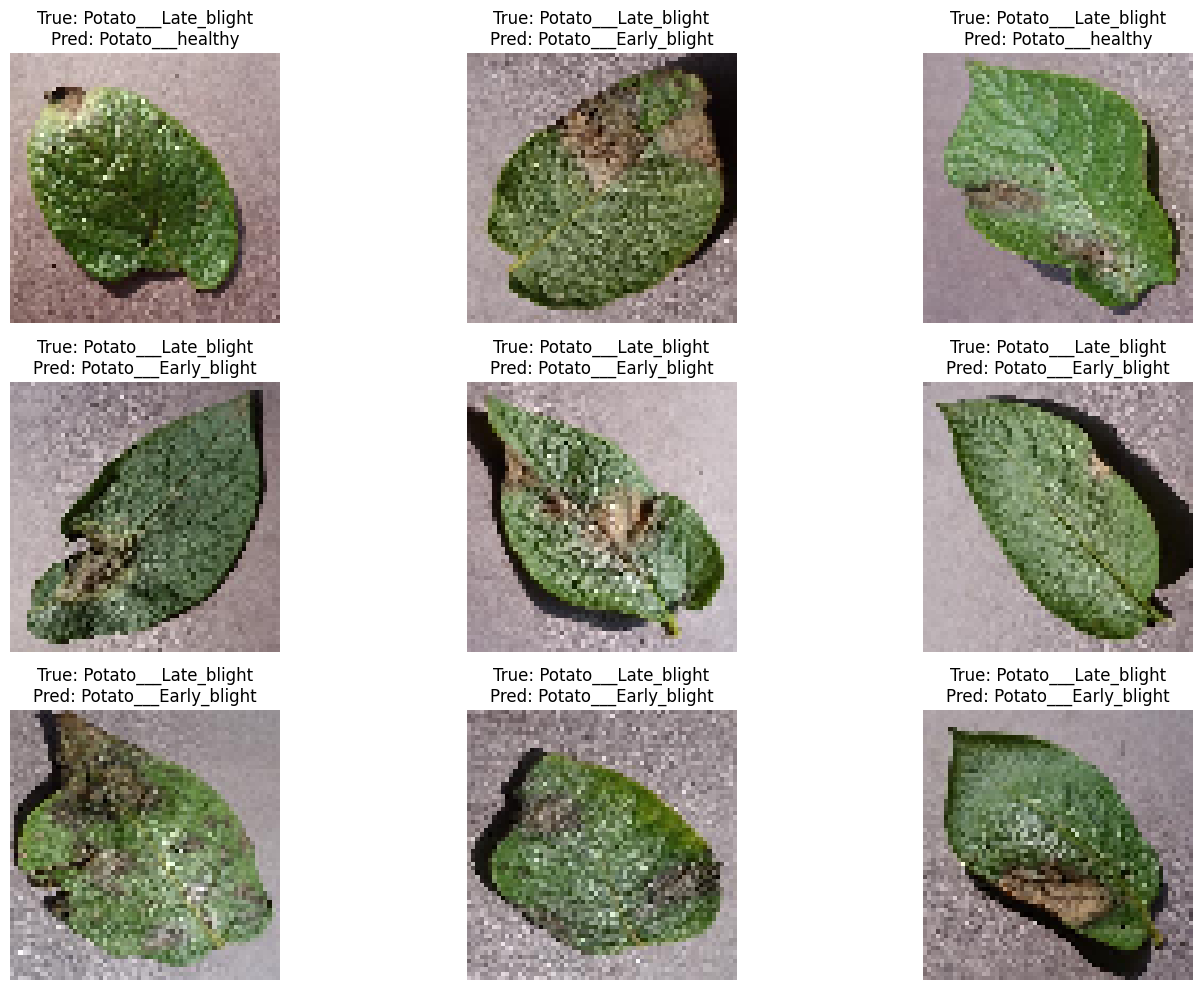

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Visualize Misclassifications
# Reset the validation data generator
val_data.reset()

# Create lists to hold misclassified images and their true and predicted labels
misclassified_images = []
misclassified_true_labels = []
misclassified_pred_labels = []

# Set a limit for the number of batches to process
max_batches = 10  # Adjust this based on your needs
batch_count = 0

# Iterate over the validation generator
for images, labels in val_data:
    predictions_batch = simple_model.predict(images)  # Make predictions for the batch
    predicted_classes_batch = np.argmax(predictions_batch, axis=1)  # Get predicted classes
    true_classes_batch = np.argmax(labels, axis=1)  # Get true classes

    # Identify misclassified images using numpy
    misclassifications = predicted_classes_batch != true_classes_batch
    misclassified_indices = np.where(misclassifications)[0]

    # Collect misclassified images and labels
    for idx in misclassified_indices:
        misclassified_images.append(images[idx])  # Store misclassified image
        misclassified_true_labels.append(true_classes_batch[idx])  # Store true label
        misclassified_pred_labels.append(predicted_classes_batch[idx])  # Store predicted label

    batch_count += 1
    if batch_count >= max_batches:  # Break after a set number of batches
        break

# Print the number of misclassifications
print(f'Total Misclassifications: {len(misclassified_images)}')

# Plot a few misclassified images
plt.figure(figsize=(15, 10))
for i in range(min(9, len(misclassified_images))):  # Display first 9 misclassified samples
    plt.subplot(3, 3, i + 1)
    plt.imshow(misclassified_images[i])  # Get the misclassified image
    plt.title(f'True: {class_labels[misclassified_true_labels[i]]}\nPred: {class_labels[misclassified_pred_labels[i]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━

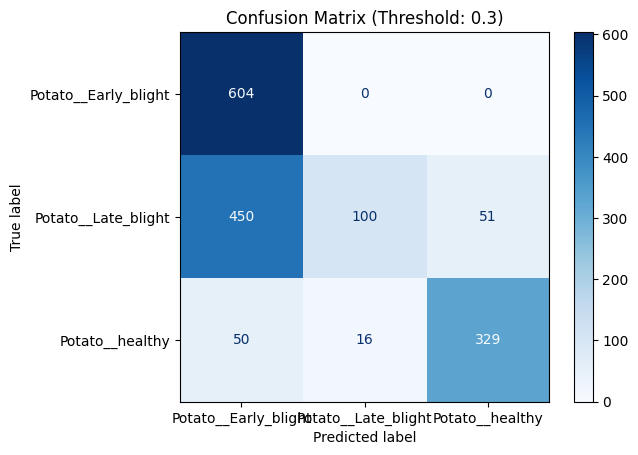

Confusion Matrix (Threshold: 0.3):
 [[604   0   0]
 [450 100  51]
 [ 50  16 329]]


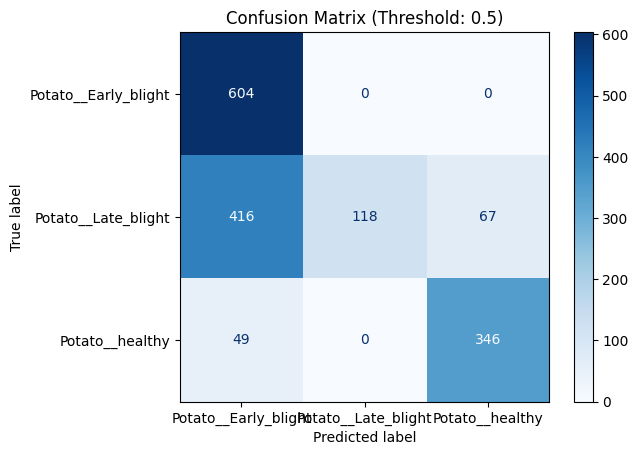

Confusion Matrix (Threshold: 0.5):
 [[604   0   0]
 [416 118  67]
 [ 49   0 346]]


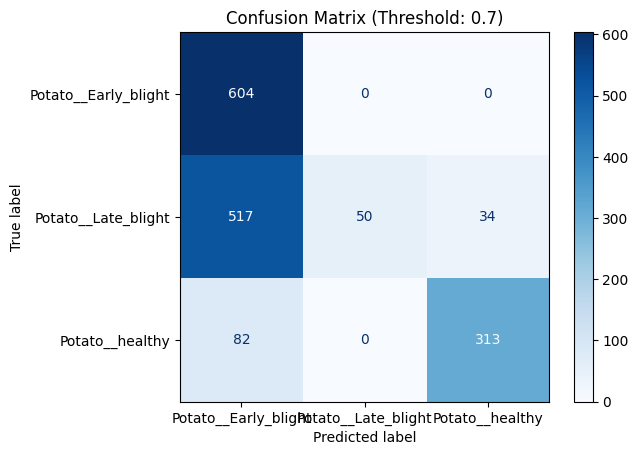

Confusion Matrix (Threshold: 0.7):
 [[604   0   0]
 [517  50  34]
 [ 82   0 313]]


In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter

class_labels = ['Potato__Early_blight', 'Potato__Late_blight', 'Potato__healthy']

val_data.reset()

true_labels = []
pred_labels = []
all_predictions = []

max_batches = 50
batch_count = 0

for images, labels in val_data:
    predictions_batch = simple_model.predict(images)
    predicted_classes_batch = np.argmax(predictions_batch, axis=1)
    true_classes_batch = np.argmax(labels, axis=1)

    true_labels.extend(true_classes_batch)
    pred_labels.extend(predicted_classes_batch)
    all_predictions.extend(predictions_batch)

    batch_count += 1
    if batch_count >= max_batches:
        break

class_distribution = Counter(true_labels)
print("Class distribution in validation set:", class_distribution)

def adjust_predictions(predictions, threshold=0.5):
    return [1 if pred >= threshold else 0 for pred in predictions]

thresholds = [0.3, 0.5, 0.7]
for threshold in thresholds:
    adjusted_preds = [adjust_predictions(pred, threshold) for pred in all_predictions]
    adjusted_pred_labels = [np.argmax(pred) for pred in adjusted_preds]
    
    cm = confusion_matrix(true_labels, adjusted_pred_labels)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix (Threshold: {threshold})')
    plt.show()

    print(f"Confusion Matrix (Threshold: {threshold}):\n", cm)


